### Regularization

Regularization is a very important technique in machine learning to prevent overfitting. 

it adds a regularization term in order to prevent the coefficients to fit so perfectly to overfit. 

Regularization: L1 and L2
    
L2 is the sum of the square of the weights, while L1 is just the  absolute sum of the weights.

Regularization is a technique to reduce the complexity of the model. It does this by penalizing the loss function. This helps to solve the overfitting problem.

### Lets try to understand what is penalizing the loss function

Loss function is the sum of squared difference between the actual value and the predicted value

<img src='images/loss.PNG' height='40%' width='40%'/>

As the degree of the input features increases the model becomes complex and tries to fit all the 
data points as shown below

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
x=np.array([0,1,2,3,4,5])
y=np.array([0,0.8,0.9,0.1,-0.8,-1])

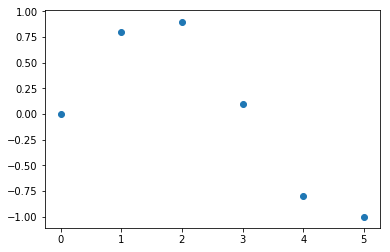

In [3]:
plt.scatter(x,y)
plt.show()

In [4]:
def poly(deg):
    p = PolynomialFeatures(deg)
    new_x=p.fit_transform(x.reshape(-1,1))
    
    lg = LinearRegression()
    pred=lg.fit(new_x,y).predict(new_x)
    #print (lg.coef_)
    plt.scatter(x,y)
    plt.plot(x,pred)
    plt.show()

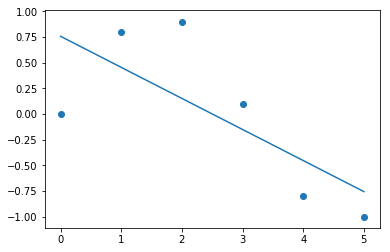

In [5]:
poly(1)

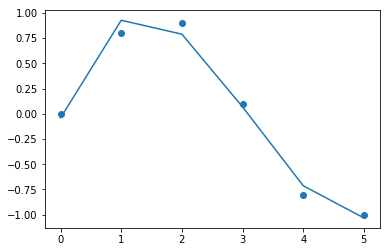

In [6]:
poly(3)

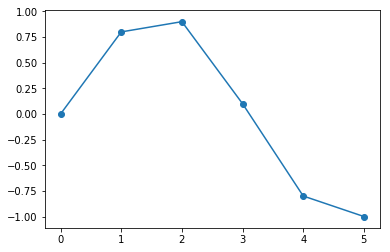

In [7]:
poly(5)

Regularization works on assumption that smaller weights generate simpler model and thus helps avoid overfitting.

we penalize all the weights by making them small. This also makes the model simpler and less prone to overfitting

<img src='images/reg_1.PNG' width='40%' height='40%'/>

We have added the regularization term to the sum of squared differences between the actual value and predicted value. Regularization term keeps the weights small making the model simpler and avoiding overfitting.

λ is the penalty term or regularization parameter which determines how much to penalizes the weights.

When λ is zero then the regularization term becomes zero. We are back to the original Loss function.

<img src='images/reg_2.PNG' width='50%' height='50%'/>

When λ is large, we penalizes the weights and they become close to zero. This results is a very simple model having a high bias or is underfitting.

### L1 regularization is also referred as L1 norm or Lasso.

- In L1, we shrink the parameters to zero. 

- L1 regularization does feature selection. It does this by assigning insignificant input features with zero weight and useful features with a non zero weight.

- In L1 regularization we penalize the summation of absolute value of the weights.

<img src='images/L1.PNG' width='50%' height='50%'/>

### L2 Regularization or Ridge Regularization

- In L2 regularization, regularization term is the sum of square of all feature weights
- L2 regularization forces the weights to be small but does not make them zero and does non sparse solution.

<img src='images/L2.PNG' weight='30%' height='30%'/>

In [8]:
from sklearn.linear_model import Ridge

In [9]:
def ridge_poly(deg):
    p = PolynomialFeatures(deg)
    new_x=p.fit_transform(x.reshape(-1,1))
    
    lg = Ridge()
    pred=lg.fit(new_x,y).predict(new_x)
    print (lg.coef_)
    plt.scatter(x,y)
    plt.plot(x,pred)
    plt.show()

[ 0.          0.22791121  0.18511098  0.05736181 -0.11794044  0.0291795
 -0.00202463]


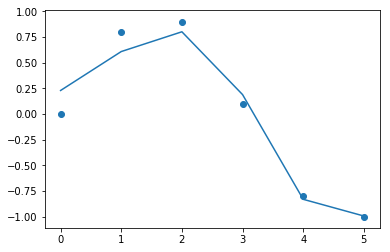

In [10]:
ridge_poly(6)

In [11]:
a=[.0001,.001,.01,.1,1,101,100]
for i in a:
    rid = Ridge(alpha=i)
    rid.fit(new_x,y)
    pred = rid.predict(new_x,y)
    plt.scatter(x,y)
    plt.plot(x,pred)
    plt.show()
    

NameError: name 'new_x' is not defined

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()

In [ ]:
X = boston.data
y = boston.target

In [ ]:
X.shape

In [ ]:
import pandas as pd

In [ ]:
df=pd.DataFrame(X,columns=boston.feature_names)
df['target']=y

In [ ]:
df.head()

In [ ]:
#df.iloc[:-1].describe()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=10)

In [ ]:
x_train.shape

In [ ]:
p=PolynomialFeatures(degree=4)
X_p_train=p.fit_transform(x_train)
X_p_test=p.transform(x_test)

In [ ]:
lg = LinearRegression()
lg.fit(X_p_train,y_train)

In [ ]:
r2_score(y_test,lg.predict(X_p_test))

In [ ]:
print('train score:',lg.score(X_p_train,y_train))
print('test score:',lg.score(X_p_test,y_test))

In [ ]:
std = StandardScaler()
train_std = std.fit_transform(x_train)
test_std = std.transform(x_test)

In [ ]:
poly = PolynomialFeatures()
X_poly = poly.fit_transform(train_std)
X_test_poly = poly.transform(test_std)

In [ ]:
### Ridge regression/Linear Regression

In [ ]:
r = Ridge()
r.fit(X_p_train,y_train)

In [ ]:
print('train score:',r.score(X_p_train,y_train))
print('test score:',r.score(X_p_test,y_test))

In [ ]:
deg=[2,3,4,5,6,7,8,9]
alpha=[.0001,.001,.01,.1,1,10,100]
for k in deg:
    for j in alpha:
        poly = PolynomialFeatures(degree=k)
        X_train = poly.fit_transform(x_train)
        X_test = poly.transform(x_test)
        
        r = Ridge(alpha=j)
        r.fit(X_train,y_train)
        print('when d={} and alpha={}'.format(k,j))
        print('test_score:',r2_score(y_test,r.predict(X_test)))
        print('train_score:',r2_score(y_train,r.predict(X_train)))